In [38]:
import pandas as pd 
import dataparser 
import numpy as np

pd.set_option('display.max_columns', None)
data=pd.read_csv('_data.csv', index_col=1)

#если цена не в рублях то выбрасываем, цены на доллар и евро сильно меняются, непонятно какая цена в рублях (там всего 27 вариантов)
data=data[data['Цена'].str.contains('руб.')].reset_index()

#убираем всех не из Москвы
data=data[data['Адрес'].str.contains('Москва')].reset_index()

#заполняем пустые места для количества комнат, так как это студии, 1 комната
#фича "Тип" у всех одинаковая, дропаем
data=data.fillna({'Количество комнат':1})\
        .drop('Тип',axis=1)

In [47]:
data.columns

Index(['index', 'ID  объявления', 'Unnamed: 0', 'Количество комнат', 'Метро',
       'Адрес', 'Площадь, м2', 'Дом', 'Парковка', 'Цена', 'Телефоны',
       'Описание', 'Ремонт', 'Площадь комнат, м2', 'Балкон', 'Окна', 'Санузел',
       'Можно с детьми/животными', 'Дополнительно', 'Название ЖК',
       'Серия дома', 'Высота потолков, м', 'Лифт', 'Мусоропровод',
       'Ссылка на объявление'],
      dtype='object')

In [93]:
def get_col_room(data):
    return data['Количество комнат'].astype(str).apply(lambda x: int(x[0]))

def get_price(data):
    return data['Цена'].astype(str).apply(lambda x: float(dataparser.splbac(x,'руб./')[0]))

def get_area_lamb(s):
    if '/'in s:
        return float(dataparser.splbac(s,'/')[0])
    else:
        return float(s)

def get_area(data):
    return data['Площадь, м2'].astype(str).apply(get_area_lamb)

def get_metro(data):
    return data['Метро'].astype(str).apply(lambda x: dataparser.splfb(x,))


cdata=pd.DataFrame()
cdata['col_rooms']=get_col_room(data)
cdata['price']=get_price(data)
cdata['full_area']=get_area(data)
cdata


,col_rooms,price,full_area
0,4,500000.0,200.0
1,4,500000.0,198.0
2,4,500000.0,200.0
3,4,400000.0,170.0
4,2,225000.0,58.0
...,...,...,...
19709,1,42000.0,35.0
19710,1,45000.0,38.7
19711,2,50000.0,43.1
19712,2,55000.0,52.5


In [78]:
cdata

,col_rooms,price,full_area
0,4,500000.0,200.0
1,4,500000.0,198.0
2,4,500000.0,200.0
3,4,400000.0,170.0
4,2,225000.0,58.0
...,...,...,...
19709,1,42000.0,35.0
19710,1,45000.0,38.7
19711,2,50000.0,43.1
19712,2,55000.0,52.5


<Axes: xlabel='col_rooms', ylabel='price'>

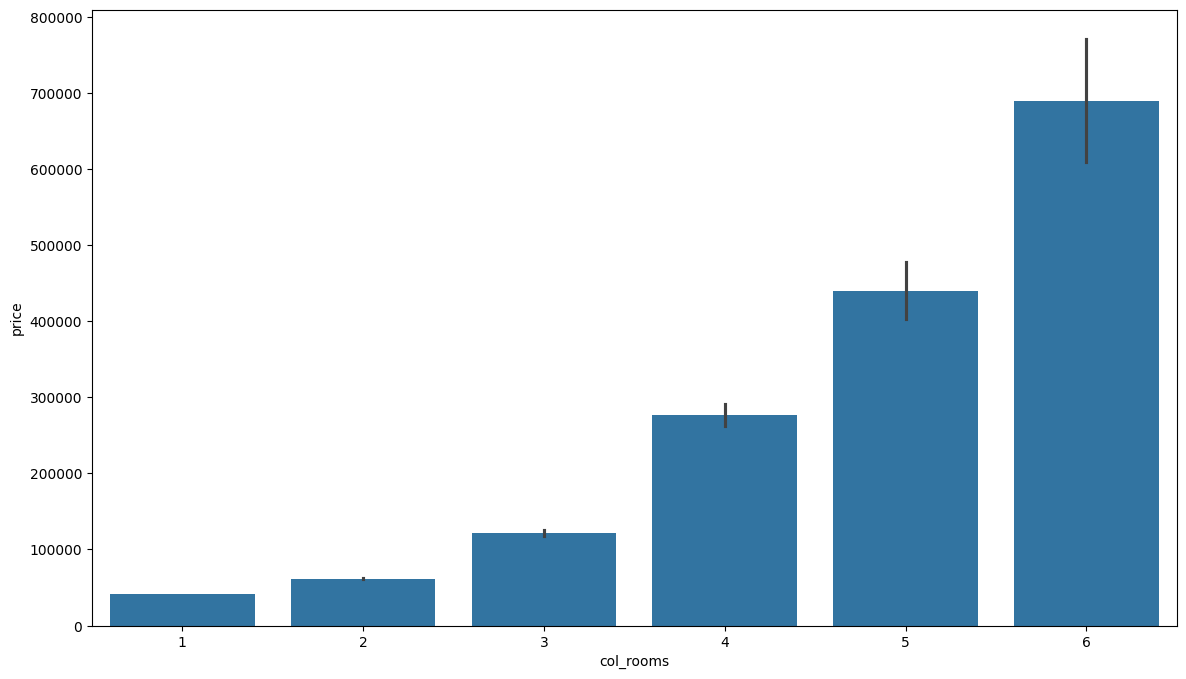

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14,8))
cdata=cdata.sort_values('col_rooms')
sns.barplot(x=cdata['col_rooms'], y=cdata['price'])

<Axes: xlabel='col_rooms', ylabel='price'>

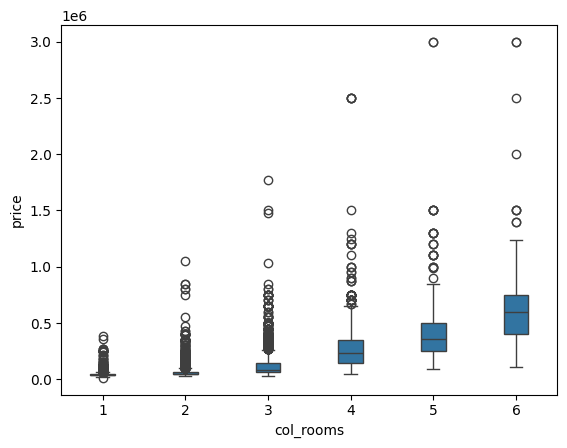

In [95]:
sns.boxplot(x="col_rooms", y="price", data=cdata,width=0.3)

In [70]:
data['Метро']

0        м. Смоленская (9 мин пешком)
1        м. Смоленская (8 мин пешком)
2        м. Смоленская (7 мин пешком)
3        м. Смоленская (3 мин пешком)
4         м. Арбатская (7 мин пешком)
                     ...             
19709      м. Говорово (8 мин пешком)
19710      м. Солнцево (7 мин пешком)
19711      м. Солнцево (6 мин пешком)
19712     м. Солнцево (11 мин пешком)
19713     м. Говорово (10 мин пешком)
Name: Метро, Length: 19714, dtype: object

In [53]:
getcolroom(data)

0        4
1        4
2        4
3        4
4        2
        ..
19709    1
19710    1
19711    2
19712    2
19713    2
Name: Количество комнат, Length: 19714, dtype: object

In [52]:
data

,index,ID объявления,Unnamed: 0,Количество комнат,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,0,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.00,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,1,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.50,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,2,"4, Оба варианта",м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,3,272197456,3,"4, Оба варианта",м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",ID 31618: Эксклюзивное предложение. Современн...,Евроремонт,14-42-20-19,NaN,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,4,273614615,4,2,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,Евроремонт,20 18,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.90,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19709,23339,215565511,23363,1,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0/16.4/8.0,10/14,NaN,"42000.0 руб./ За месяц, Залог - 42000 руб., Ко...",+79154383401,Сдаётся светлая теплая квартира (студия) с бал...,Евроремонт,NaN,Балкон (1),NaN,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Мещерский лес,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/215565511
19710,23340,274654844,23364,1,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровс...",38.7/16.5/11.0,"5/18, Монолитный",NaN,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",+79151173402,Сдам однокомнатную квартиру на длительный срок...,Евроремонт,NaN,Лоджия (1),Во двор,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Лучи,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/274654844
19711,23341,268679909,23365,"2, Оба варианта",м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",NaN,"50000.0 руб./ За месяц, Залог - 50000 руб., Ко...",+79653825192,Рассматриваются квартиранты только славяне и т...,Дизайнерский,NaN,Балкон (1),На улицу и двор,Совмещенный (1),Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",NaN,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/268679909
19712,23342,274807525,23366,2,м. Солнцево (11 мин 

In [51]:
getprice(data)

0        (5, 50)
1        (5, 50)
2        (5, 50)
3        (4, 40)
4        (2, 22)
          ...   
19709    (4, 42)
19710    (4, 45)
19711    (5, 50)
19712    (5, 55)
19713    (5, 57)
Name: Цена, Length: 19714, dtype: object